In [1]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
def normal(n,a):
    j=-a
    if nm.any(n> a):
        return (n-a)    
    elif nm.any(n < j):
        return (n+a)
    else:
        return 0
    

In [3]:
def cd_lasso(t,x,y,a=.05,it=100,k=False):
    m,n=x.shape
    x = x / (nm.linalg.norm(x,axis = 0))
    for i in range (it):
        for j in range(n):
            s=x[:,j].reshape(-1,1)
            r=nm.dot(x,t)
            p=nm.dot(s.T,(t[j]*s + y-r))
            if k==True and j==0:
                t[j]=p
            else:
                t[j]= normal(p,a)
    return t.flatten()


(506, 1)
(506, 13)


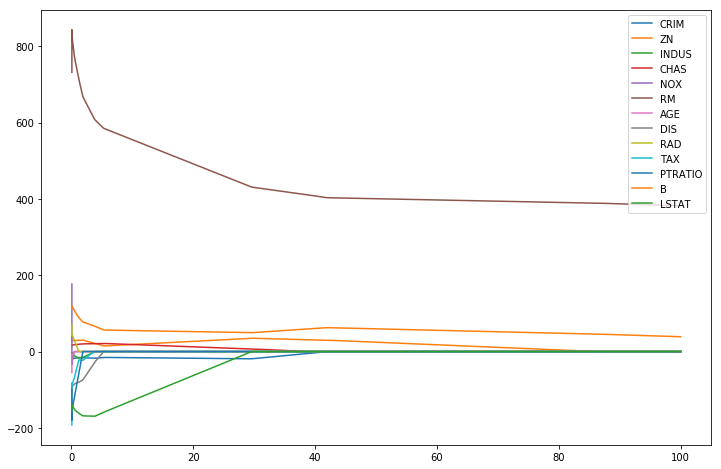

In [4]:
ab=load_boston()
x=ab.data
y=ab.target.reshape(-1,1)
print(y.shape)
print(x.shape)
jj=ab.feature_names
m,n=x.shape
s=nm.ones((n,1))
tl=list()
a=nm.logspace(0,3,800)/10
for i in a:
    t=cd_lasso(s,x,y,a=i,it=100)
    tl.append(t)
tl=nm.stack(tl).T
n,ab=tl.shape
plt.figure(figsize=(12,8))
for i in range(n):
    plt.plot(a,tl[i],label=jj[i])
plt.legend()